# Vino Verde 🍷🍷

1. Import usual libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

2. Download the dataset from the following url: `"https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/winequality-red.csv"`

You'll find a description of the variables [here](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) where you'll find a description of the variables. Display the first few lines of the dataset.

In [41]:
dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2.bis Transform all variable names so that all spaces are replaced with "_".

In [42]:
dataset.columns = [col.replace(" ","_") for col in dataset.columns]
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


3. Use a command to get the variable type of each variable in the dataset as well as potential number of missing values.

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


4. Plot the distributions of each of the explanatory variables against the target variable and analyse what you see. Which features seem important to estimate the wine quality?

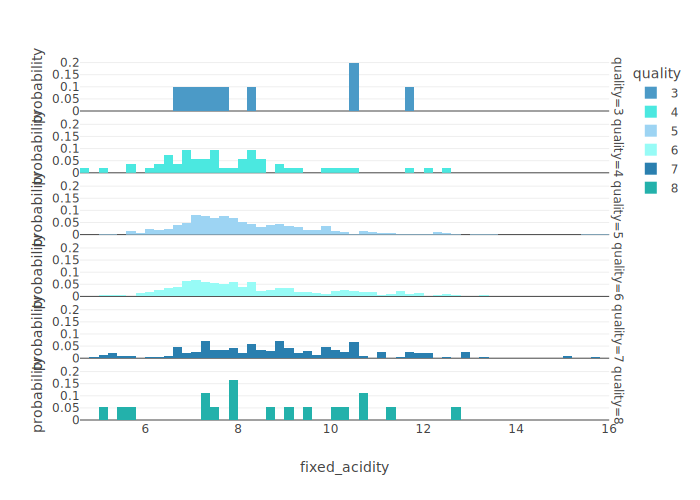

In [44]:
# Univariate analysis
# Distribution of each numeric variable
num_features = [c for c in dataset.columns if c != 'quality']
cat_order = {
    'quality': [3, 4, 5, 6, 7, 8]
}

def display_distribution(f):
    fig = px.histogram(dataset, f, color = 'quality', facet_row = 'quality', histnorm = 'probability', 
                       category_orders = cat_order)
    fig.show()
    
display_distribution('fixed_acidity')

It seems the fixed acidity increases a bit when the quality increases.

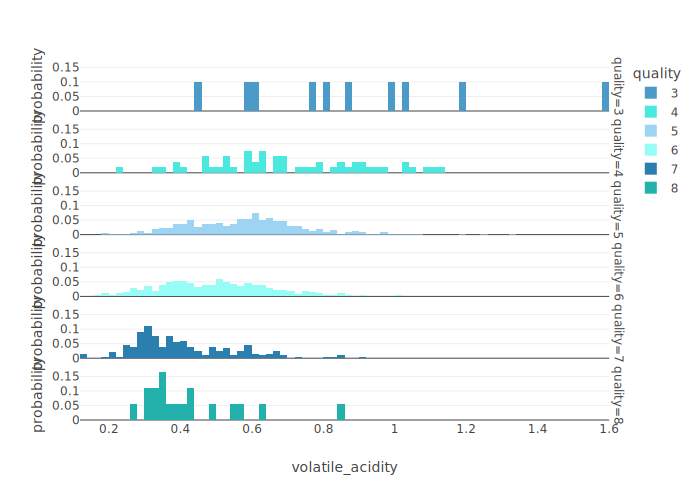

In [45]:
display_distribution('volatile_acidity')

There's a general decrease in volatile acidity when the quality increases.

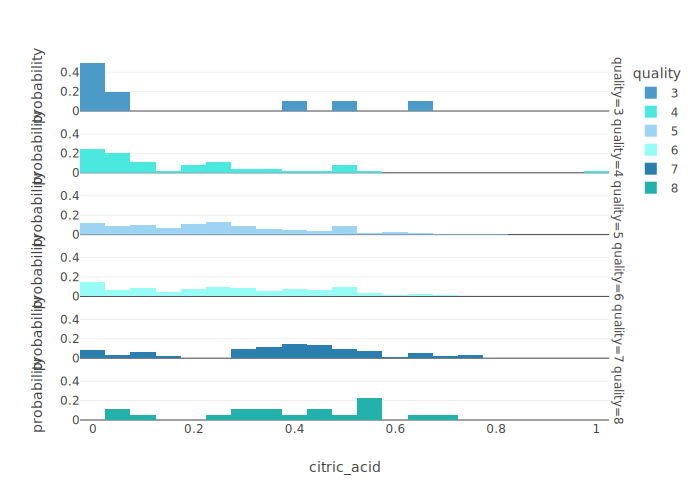

In [46]:
display_distribution('citric_acid')

Lower quality (\< 5) seem to be often related to very low values of citric acid, whereas Higher quality (\> 6) seem to be mostly linked with the highest values of citric acid.

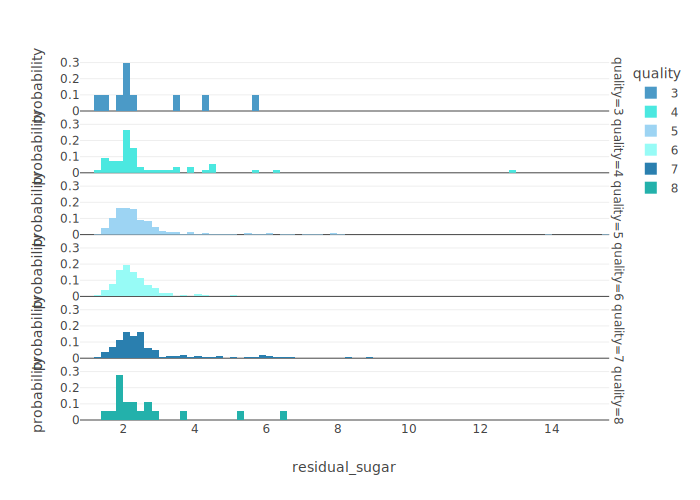

In [47]:
display_distribution('residual_sugar')

The residual sugar doesn't seem very important in the wine quality.

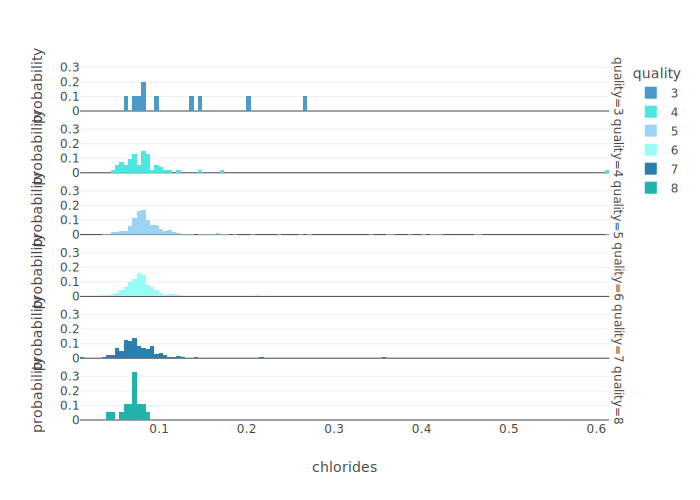

In [48]:
display_distribution('chlorides')

The chlorides don't seem very important in the wine quality.

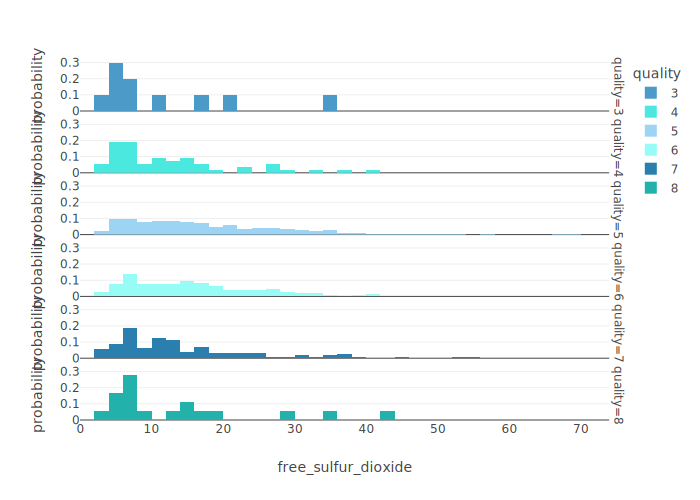

In [49]:
display_distribution('free_sulfur_dioxide')

The free sulfur dioxide doesn't seem very important in the wine quality.

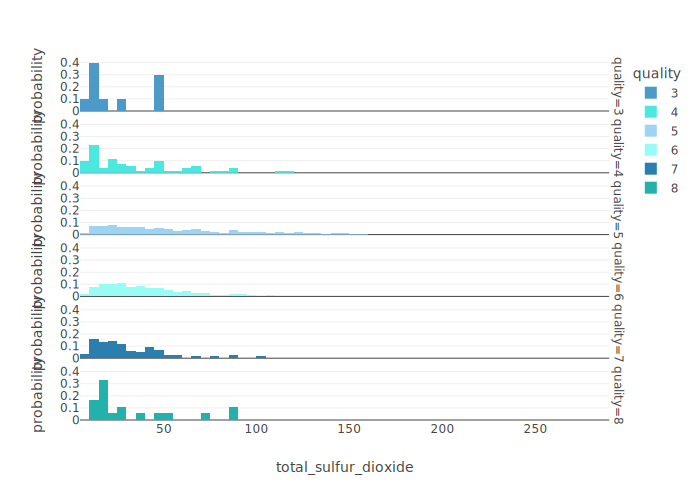

In [50]:
display_distribution('total_sulfur_dioxide')

The total sulfur dioxide doesn't seem very important in the wine quality.

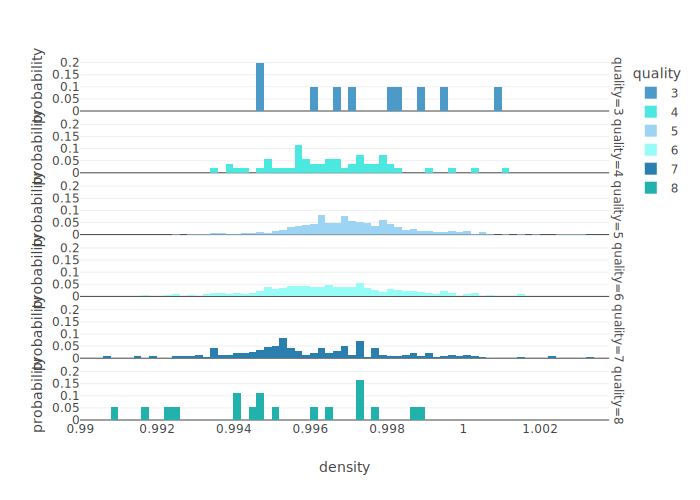

In [51]:
display_distribution('density')

The distributions of density change depending on the values of quality, but the relationship seems more complex than a simple linear relationship.

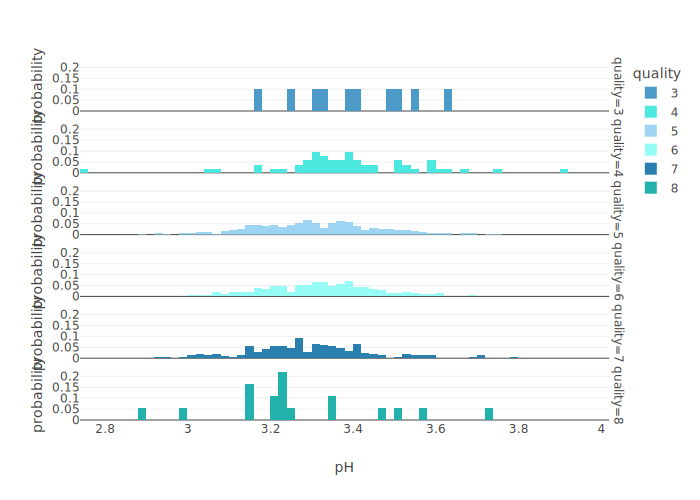

In [52]:
display_distribution('pH')

The pH doesn't seem very important in the wine quality.

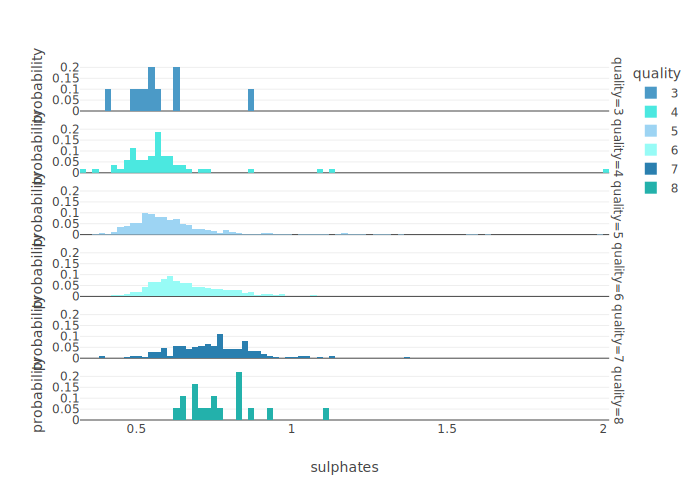

In [53]:
display_distribution('sulphates')

The sulphates do increase a lot when the wine quality increases!

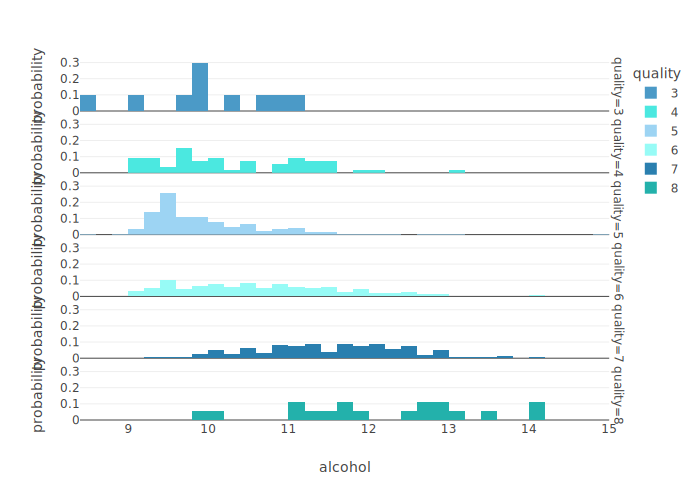

In [54]:
display_distribution('alcohol')

The alcohol does increase a lot when the quality increases! 

Remember: correlation is not causality! It doesn't mean that more alcohol causes tastier wine, hips 🥴

5. Is the target variable uniformely distributed across all possible values? Is it possible to use logistic regression to predict the values of quality? How?

In [55]:
dataset['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Logistic regressions can be used to model ordinal **discrete** variables. In this case, the problem will be transformed into a **multiclass classification**. 

We can use the original version of the target variable for what follows. As the target is already in numeric format, it won't be necessary to encode the labels 🙂

6. Create a baseline model (univariate logistic regression). Take one feature that seems to be a good predictor for the wine quality. What's the model accuracy on train/test sets?

Hint: if some preprocessings are necessary, apply it to X_train/X_test

In [56]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["alcohol"]
target_variable = "quality"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

X :
   alcohol
0      9.4
1      9.8
2      9.8
3      9.8
4      9.4


In [57]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [58]:
print("Preprocessing X_train...")
print(X_train.head())
print()
preprocessor = StandardScaler()
X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print() 

# Test pipeline
print("Preprocessing X_test...")
print(X_test.head())
print()
X_test = preprocessor.transform(X_test)
print("...Done!")
print(X_test[0:5,:]) # X_test is now a numpy array
print() 

Preprocessing X_train...
      alcohol
642       9.4
679       9.6
473      10.6
390      12.9
1096     10.8

...Done!
[[-0.95579434]
 [-0.76727388]
 [ 0.17532846]
 [ 2.34331382]
 [ 0.36384892]]

Preprocessing X_test...
      alcohol
1109     10.8
1032      9.6
1002     11.7
487      10.0
979      10.4

...Done!
[[ 0.36384892]
 [-0.76727388]
 [ 1.21219102]
 [-0.39023294]
 [-0.01319201]]



In [59]:
# Train model
print("Train model...")
baseline = LogisticRegression()
baseline.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [60]:
# Print accuracy
print("accuracy score on training set : ", baseline.score(X_train, Y_train))
print("accuracy score on test set : ", baseline.score(X_test, Y_test))

accuracy score on training set :  0.5465207193119624
accuracy score on test set :  0.578125


7. Use cross-validation with cv=10 to get a better feel of the model's average performance on this dataset.

In [61]:
# Perform 10-fold cross-validation 
print("10-fold cross-validation...")
scores = cross_val_score(baseline, X_train, Y_train, cv=10)
print('The cross-validated accuracy is : ', scores.mean())
print('The standard deviation is : ', scores.std())

10-fold cross-validation...
The cross-validated accuracy is :  0.5410617618110236
The standard deviation is :  0.027051325500817094


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 8 members, which is less than n_splits=10.



8. What would be the test accuracy for a "dummy" model that would always predict the most frequent class? Is the baseline model interesting?

From question 5., we know that the most frequent class is `quality = 5`. Let's create a list Y_pred_dummy in which every element is equal to 5, and compute the accuracy:

In [62]:
Y_test_pred_dummy = [5]*len(Y_test)
print("dummy accuracy on test set : ", accuracy_score(Y_test, Y_test_pred_dummy))

dummy accuracy on test set :  0.421875


The baseline model is already much more efficient than a dummy model!

9. Train a multivariate model by including all the features and compute its accuracy on train/test.

Hint1: Do the explanatory variables need imputation, encoding or normalization? If so proceed to the necessary transformations. Why is normalization important when using logistic regression?

Hint2: If you get a "convergence warning" while training the model, you might want to increase the value of the argument "max_iter" in the LogisticRegression 🤓

In [63]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])


Number of rows : 1599

Display of dataset: 


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Basics statistics: 


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Percentage of missing values: 


fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

The preprocessings are again quite simple here:
* no missing values imputation
* all the features are numeric, so we want to apply a StandardScaler to the whole X array (this is crucial, especially if we plan to interpret the model's coefficients)
* The target is categorical (multiclass) but is already encoded as integer values, so there's no need for a LabelEncoder

In [64]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "quality"

X = dataset.drop(target_variable, axis = 1)
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

X :
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.

In [65]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
# WARNING : don't forget stratify=Y for classification problems
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [66]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = scaler.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
812            10.8              0.45         0.33             2.5      0.099   
1249            7.1              0.60         0.01             2.3      0.079   
1421            7.5              0.40         0.18             1.6      0.079   
157             7.1              0.43         0.42             5.5      0.071   
377             9.4              0.27         0.53             2.4      0.074   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
812                  20.0                  38.0  0.99818  3.24       0.71   
1249                 24.0                  37.0  0.99514  3.40       0.61   
1421                 24.0                  58.0  0.99650  3.34       0.58   
157                  28.0                 128.0  0.99730  3.42       0.71   
377                   6.0                  18.0  0.99620  3.20       1.13   

      al

In [67]:
# Train model
print("Train model...")
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [68]:
# Print accuracy
print("accuracy score on training set : ", classifier.score(X_train, Y_train))
print("accuracy score on test set : ", classifier.score(X_test, Y_test))

accuracy score on training set :  0.6004691164972635
accuracy score on test set :  0.61875


10. Is this model significantly better than the baseline?

In [69]:
# Perform 10-fold cross-validation 
print("10-fold cross-validation...")
scores = cross_val_score(classifier, X_train, Y_train, cv=10)
print('The cross-validated accuracy is : ', scores.mean())
print('The standard deviation is : ', scores.std())

10-fold cross-validation...
The cross-validated accuracy is :  0.5910986712598425
The standard deviation is :  0.05437570023889957


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 8 members, which is less than n_splits=10.



The multivariate model is just slightly better than the baseline. 

11. Extract the model's predictions on train/test sets. Use these values to plot the confusion matrices.

In [70]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()


Predictions on training set...
...Done.
[6 6 5 5 7]

Predictions on test set...
...Done.
[6 6 5 6 6]



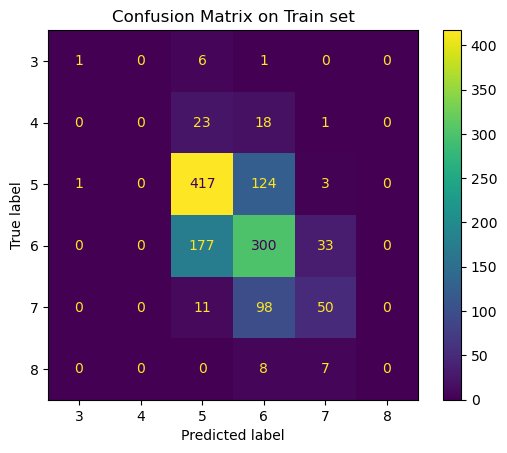

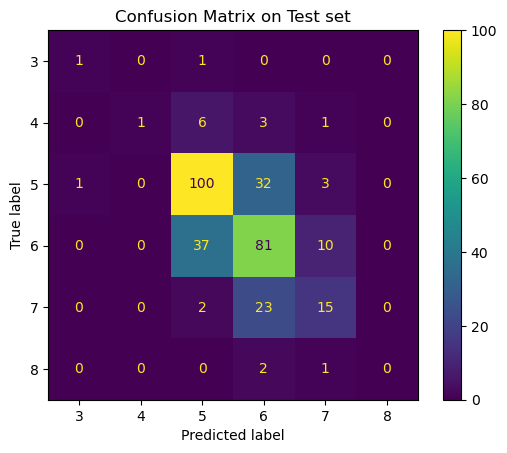

In [71]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

12. Analyze the model's coefficients. Can you deduce easily what are the most important features to predict the wine quality?

In [72]:
print('Coefficients of the Logistic regression model:')
classifier.coef_

Coefficients of the Logistic regression model:


array([[ 0.27060716,  1.10824499, -0.11693239, -0.06366216,  0.88540628,
         0.39251587, -0.97690623,  0.44249235,  0.6483249 , -0.51109937,
        -0.8239986 ],
       [ 0.42664592,  0.40923246,  0.00212853,  0.16810606,  0.37510567,
        -0.3743698 ,  0.29887719, -0.48982462,  0.42426301, -0.34652282,
        -0.71775061],
       [-0.5702882 ,  0.04065648,  0.09812779, -0.27141517,  0.1925075 ,
        -0.16915197,  0.83781279,  0.40636785, -0.20881398, -0.39094148,
        -0.61066426],
       [-0.1936238 , -0.37970415, -0.20076935, -0.16341029,  0.10398837,
         0.01654153,  0.36941494,  0.13287057, -0.16473696, -0.01015884,
         0.20759939],
       [ 0.41268905, -0.6990252 , -0.09415907,  0.24925508, -0.5110583 ,
         0.04582793,  0.07438212, -0.376809  , -0.06385987,  0.45218605,
         0.63933854],
       [-0.34603013, -0.47940458,  0.31160449,  0.08112648, -1.04594952,
         0.08863645, -0.60358081, -0.11509716, -0.6351771 ,  0.80653648,
         1.305

In [73]:
# Create a pandas DataFrame with the model's coefficients
coefs = pd.DataFrame(index = X.columns, data = classifier.coef_.transpose(), columns=[3, 4, 5, 6, 7, 8])
coefs

,3,4,5,6,7,8
fixed_acidity,0.270607,0.426646,-0.570288,-0.193624,0.412689,-0.346030
volatile_acidity,1.108245,0.409232,0.040656,-0.379704,-0.699025,-0.479405
citric_acid,-0.116932,0.002129,0.098128,-0.200769,-0.094159,0.311604
residual_sugar,-0.063662,0.168106,-0.271415,-0.163410,0.249255,0.081126
chlorides,0.885406,0.375106,0.192508,0.103988,-0.511058,-1.045950
free_sulfur_dioxide,0.392516,-0.374370,-0.169152,0.016542,0.045828,0.088636
total_sulfur_dioxide,-0.976906,0.298877,0.837813,0.369415,0.074382,-0.603581
density,0.442492,-0.489825,0.406368,0.132871,-0.376809,-0.115097
pH,0.648325,0.424263,-0.208814,-0.164737,-0.063860,-0.635177
sulphates,-0.511099,-0.346523,-0.390941,-0.010159,0.452186,0.806536


In multiclass classification, one logistic regression is fitted independently for each category. That's why we get as many sets of coefficients as there are different values of the target! In this case, interpreting the coefficients is much more difficult. To conclude about feature importance, it would be more convenient to use a Chi2 test.

13. Use Chi2 test in order to analyse the importance of each variable in your dataset. You may find more information on this test following this link : [scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

In [74]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X, Y)
feature_importance 

(array([1.12606524e+01, 1.55802891e+01, 1.30256651e+01, 4.12329474e+00,
        7.52425579e-01, 1.61936036e+02, 2.75555798e+03, 2.30432045e-04,
        1.54654736e-01, 4.55848775e+00, 4.64298922e+01]),
 array([4.64500416e-02, 8.15035154e-03, 2.31394417e-02, 5.31804675e-01,
        9.79968040e-01, 3.82728810e-33, 0.00000000e+00, 1.00000000e+00,
        9.99526491e-01, 4.72096321e-01, 7.42403757e-09]))

14. Put these values into a DataFrame for more readability.

In [75]:
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, 
                               index=["Chi2 Score", "P-value"]).transpose().sort_values("Chi2 Score")
feature_ranking = feature_ranking.reset_index().rename({'index': 'feature'}, axis = 1)
feature_ranking

,feature,Chi2 Score,P-value
0,density,0.000230,1.000000e+00
1,pH,0.154655,9.995265e-01
2,chlorides,0.752426,9.799680e-01
3,residual_sugar,4.123295,5.318047e-01
4,sulphates,4.558488,4.720963e-01
5,fixed_acidity,11.260652,4.645004e-02
6,citric_acid,13.025665,2.313944e-02
7,volatile_acidity,15.580289,8.150352e-03
8,alcohol,46.429892,7.424038e-09
9,free_sulfur_dioxide,161.936036,3.827288e-33


15. Create a barchart visualization, what can you conclude ?

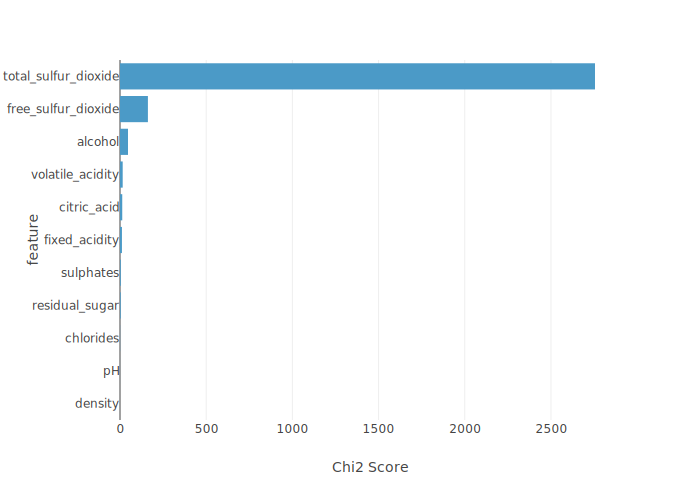

In [76]:
fig = px.bar(feature_ranking, y = 'feature', x = 'Chi2 Score')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

Surprisingly, the total sulfur dioxide and free sulfur dioxide seem to be the most important features, whereas this didn't strike at first glance from the basic EDA.

16. Try fitting the same model using the argument class_weight="balanced", what are the consequences on all the aspects of the performances studied before ?

In [77]:
classifier = LogisticRegression(class_weight="balanced") # takes into account the different classes' proportions
classifier.fit(X_train, Y_train)
Y_test_pred = classifier.predict(X_test)
# Print accuracy
print("accuracy score on training set : ", classifier.score(X_train, Y_train))
print("accuracy score on test set : ", classifier.score(X_test, Y_test))

accuracy score on training set :  0.4253322908522283
accuracy score on test set :  0.40625


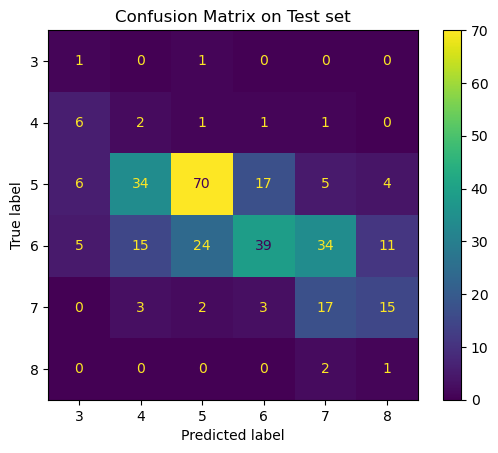

In [78]:
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

**The model's performances have been deteriorated, but now all the classes are treated with equal importances, which means that the model tries to make good predictions even for rare classes**

21. As an extra question for which no fixed solution will be proposed, attempt to improve the score using feature engineering (create new variables using common functions, combining variables together in a non-linear way etc...)